In [3]:
import pandas as pd 


In [4]:
names = ["edible","cap-shape","cap-surface", "cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stock-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","viel-type","viel-color","ring number","ring-type","spore-print-color","population","habitat"]
dataset = pd.read_csv('mush.csv',names = names)

In [5]:
dataset.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stock-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,viel-type,viel-color,ring number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
dataset.shape

(8124, 23)

In [7]:
dataset[dataset.edible =='p'].head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stock-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,viel-type,viel-color,ring number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
17,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,g


In [8]:
from ctypes import PyDLL
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix 

enc = OrdinalEncoder()
X = dataset.drop('edible', axis=1) #corresponding attributes 
y = dataset['edible'] #corresponding label (trying to predict)
#print(x.head)
#print(y.head)
y = y.values.reshape(-1,1)

encodedx = enc.fit_transform(X)
#print(encodedx)
encodedy = enc.fit_transform(y)
#print(encodedy[0:15])


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(encodedx, encodedy, test_size=0.20,random_state=1)

In [11]:
len(X_train)

6499

In [12]:
len(X_test)

1625

In [13]:
#creating KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [14]:
knn.score(X_test, y_test)

0.9987692307692307

Text(42.0, 0.5, 'Truth')

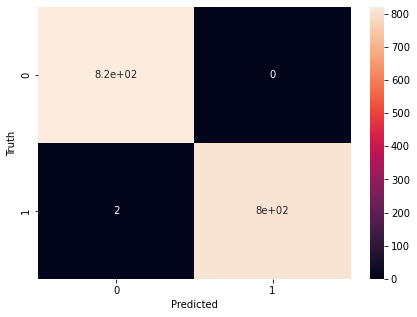

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(42.0, 0.5, 'Truth')

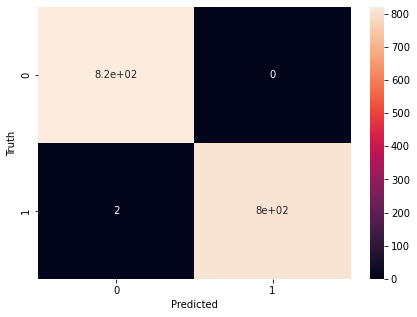

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
#Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       820
         1.0       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0, 0.5, 'Testing Accuracy')

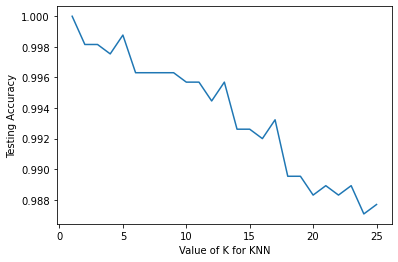

In [18]:
#Accuracy Rate Overtime as K values changes

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [19]:
#Can Give Random Values to predict random obersvations

classes = {1:"poisonous",0:"Edible"}

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.ravel())

x_new = [encodedx[0],encodedx[2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

poisonous
Edible


In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, encodedx, encodedy.ravel(), cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.84615385 0.99753846 0.92738462 1.         0.63300493]
cv_scores mean:0.8808163698370594


In [22]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn_gscv = KNeighborsClassifier()
knn_gscv.fit(encodedx, encodedy.ravel())
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_gscv, param_grid, cv=5)

#fit model to data
knn_gscv.fit(encodedx, encodedy.ravel())

#check top performing n_neighbors value
print(knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print(knn_gscv.best_score_)

{'n_neighbors': 1}
0.9065475558923834


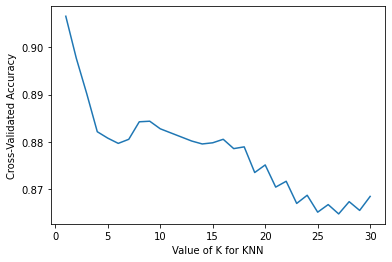

In [24]:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, encodedx, encodedy.ravel(), cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()



[0.85230769 0.99815385 0.95015385 1.         0.65024631]
cv_scores mean:0.8901723380068207
{'n_neighbors': 1}
0.9065475558923834


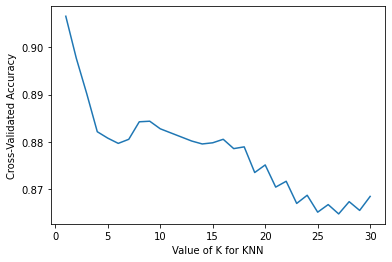

In [25]:
import pandas as pd 

names = ["edible","cap-shape","cap-surface", "cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stock-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","viel-type","viel-color","ring number","ring-type","spore-print-color","population","habitat"]

dataset = pd.read_csv('mush.csv',names = names)

from ctypes import PyDLL
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix 

enc = OrdinalEncoder()
X = dataset.drop('edible', axis=1) #corresponding attributes 
y = dataset['edible'] #corresponding label (trying to predict)
#print(x.head)
#print(y.head)
y = y.values.reshape(-1,1)

encodedx = enc.fit_transform(X)
#print(encodedx)
encodedy = enc.fit_transform(y)
#print(encodedy[0:15])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encodedx, encodedy, test_size=0.2,random_state=1)


#creating KNN classifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 

cv_scores = cross_val_score(knn_cv, encodedx, encodedy.ravel(), cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(encodedx, encodedy.ravel())

#check top performing n_neighbors value
print(knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print(knn_gscv.best_score_)



import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, encodedx, encodedy.ravel(), cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()




In [26]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(encodedx, encodedy.ravel())



MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)